**Setting Seed**

In [3]:
# set random seeds for reproducablity
import random
random.seed(177)

import numpy as np
np.random.seed(177)

import tensorflow as tf
tf.random.set_seed(177)

In [30]:
import matplotlib.pyplot as plt

**dependencies**

In [5]:
from tensorflow import keras
fashion_mnist_data=keras.datasets.fashion_mnist

In [17]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist_data.load_data()
# fashion mnist datset has 2 tuples
# trainimage->trainimagelabels,
# test_image &test_imagelabels

In [18]:
type(train_images)

numpy.ndarray

In [23]:
train_images.shape
# 60,000 images :Grey Scaled

(60000, 28, 28)

In [24]:
train_images[0].shape
# each of dim : 28*28

(28, 28)

In [25]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [26]:
type(train_images[0])

numpy.ndarray

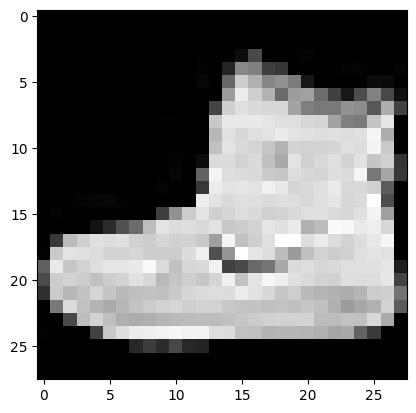

In [43]:
plt.imshow(train_images[0],cmap='gray')

In [44]:
train_labels[0]

9

**class_name=['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','SNeaker','Bag','Ankle Boot']**

In [45]:
train_images,test_images=train_images/255,test_images/255

In [46]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [53]:
# reshaping to (4) sized (batch_size,dim1,dim2,type)
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [65]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,MaxPooling2D,Conv2D,Dropout,Flatten
from keras.losses import SparseCategoricalCrossentropy

In [55]:
train_images.shape

(60000, 28, 28, 1)

In [57]:
test_images.shape

(10000, 28, 28, 1)

In [60]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [66]:
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_2 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_3 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                      

In [68]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 106s 56ms/step - loss: 0.5388 - accuracy: 0.8111 - val_loss: 0.3643 - val_accuracy: 0.8656
Epoch 2/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.3660 - accuracy: 0.8719 - val_loss: 0.3308 - val_accuracy: 0.8729
Epoch 3/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.3176 - accuracy: 0.8870 - val_loss: 0.3068 - val_accuracy: 0.8878
Epoch 4/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2887 - accuracy: 0.8976 - val_loss: 0.3079 - val_accuracy: 0.8937
Epoch 5/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2652 - accuracy: 0.9059 - val_loss: 0.3045 - val_accuracy: 0.8932
Epoch 6/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2494 - accuracy: 0.9123 - val_loss: 0.2694 - val_accuracy: 0.9068
Epoch 7/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2342 - accuracy: 0.9160 - val_loss: 0.2971 - val_accur

In [69]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.2747 - accuracy: 0.9099 - 3s/epoch - 9ms/step
0.9099000096321106


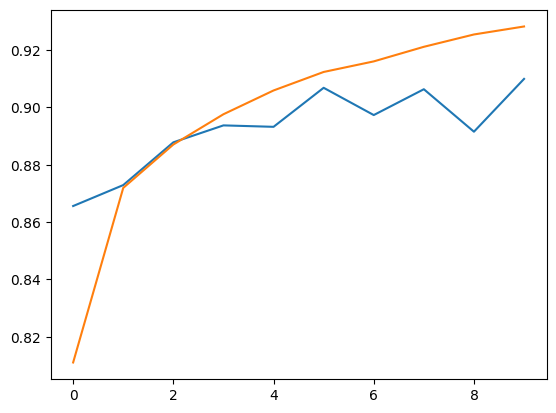

In [70]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

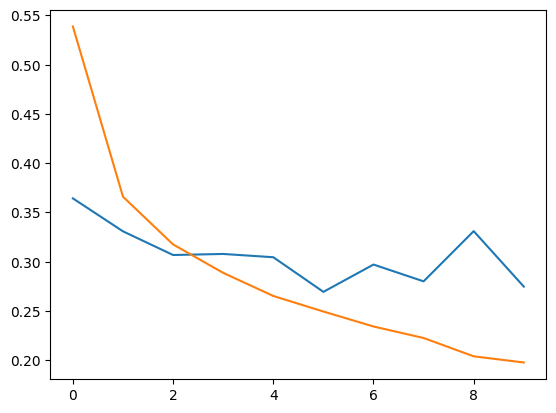

In [72]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [73]:
model.save('model_mnist_fashion.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
tf.__version__

: 